<a href="https://colab.research.google.com/github/Jaethem8y/CS167/blob/main/Project_2_NLPCHOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code
Your project should address the categories below. 

## Problem:
The problem this project seek to solve is to predict whether the movie review has positive(good) or negative(bad) sentiment. The review feature contains the review for the movie, and our target feature sentiment has value either positive or negative indicating if the review is good or bad. Possible use of this model is to use in a webscraping project for the movie website. Gather the comments and feed it in to the machine to see if the movie has, generally, positive or negative sentiment. 


# Input Pipeline (sklearn):

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/DataSets/IMDB_dataset.csv')
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- Something else: get creative :) 

This is number of samples: 50000
The classes for the target variable are: ['positive' 'negative']
Which the number is: 2
Now there is a column that has number of words in sample in column words per sample
The median of words per sample is : 173.0
The average of words per sample is : 231.15694
                                                  review  ... words per sample
0      One of the other reviewers has mentioned that ...  ...              307
1      A wonderful little production. <br /><br />The...  ...              162
2      I thought this was a wonderful way to spend ti...  ...              166
3      Basically there's a family where a little boy ...  ...              138
4      Petter Mattei's "Love in the Time of Money" is...  ...              230
...                                                  ...  ...              ...
49995  I thought this movie did a down right good job...  ...              194
49996  Bad plot, bad dialogue, bad acting, idiotic di...  ...             

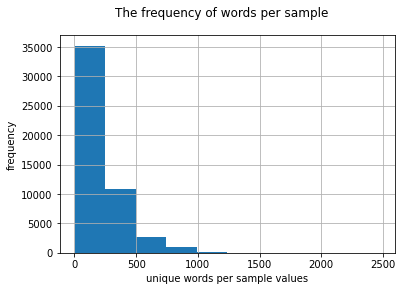

In [2]:
## Use cells here to explore the data:


# For number of samples
print("This is number of samples:",data.shape[0])


# Number of classes of the target variable
print("The classes for the target variable are:", data['sentiment'].unique())
print("Which the number is:",len(data['sentiment'].unique()))


#The number of words per sample
wps = []
for i in range(data.shape[0]):
  wps.append(len(data['review'][i].split()))
data['words per sample'] = wps
print("Now there is a column that has number of words in sample in column words per sample")
import statistics
print("The median of words per sample is :",statistics.median(wps))
print("The average of words per sample is :",statistics.mean(wps))

print(data)


# The distribution of sample length
distribution = {}
for i in range(data.shape[0]):
  if data["words per sample"][i] in distribution:
    distribution[data['words per sample'][i]] += 1
  else:
    distribution[data['words per sample'][i]] = 1
print(distribution)

data['words per sample'].hist()

import matplotlib.pyplot as plt
plt.suptitle("The frequency of words per sample")
plt.xlabel('unique words per sample values')
plt.ylabel('frequency')


#how many datas have word bad in it and actually got positive sentiment
count = 0
positive = 0
for i in range(data.shape[0]):
  if "bad" in data['review'][i]:
    if data['sentiment'][i] == 'positive':
      count += 1


print("The reviews that have word bad in it but sentiment was still positive: ",count)



#Explore the data:
- number of samples: 50000
- number of classes: 2 - [positive, negative]
- Number of words per sample: median was 173
- distribution of words per sample - diplayed in histogram
- The number of reviews that had word bad in it and sentiment was positive:3106



## Data Preparation

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [4]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [5]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    cleaned = " ".join(words)
    return cleaned

In [6]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [7]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away br br would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches du

In [8]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 5000 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [10]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
from sklearn.svm import SVC
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline

In [ ]:
clf = SVC()
clf.fit(train_data_vectors,train_sln)
predictions = clf.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))


accuracy: 0.8307


In [ ]:
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

            Pred positive  Pred negative
T positive           4203            762
T negative            931           4104


#For SVC
- For baseline the accuracy was .8307.
- 762 false positive and 931 false negative

In [11]:
c_val = [0.5,1,1.5,2]
accuracy = []
for c in c_val:
  print("C is :",c)
  clf = SVC(C=c)
  clf.fit(train_data_vectors,train_sln)
  predictions = clf.predict(test_data_vectors)
  accuracy.append(metrics.accuracy_score(test_sln,predictions))
  print("accuracy:", metrics.accuracy_score(test_sln, predictions))
  vals = data['sentiment'].unique() ## possible classification values
  conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
  print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))
  print("---------------------------------------------- \n\n")

C is : 0.5
accuracy: 0.827
            Pred positive  Pred negative
T positive           4210            755
T negative            975           4060
---------------------------------------------- 


C is : 1
accuracy: 0.8307
            Pred positive  Pred negative
T positive           4203            762
T negative            931           4104
---------------------------------------------- 


C is : 1.5
accuracy: 0.8329
            Pred positive  Pred negative
T positive           4217            748
T negative            923           4112
---------------------------------------------- 


C is : 2
accuracy: 0.8324
            Pred positive  Pred negative
T positive           4215            750
T negative            926           4109
---------------------------------------------- 




No handles with labels found to put in legend.


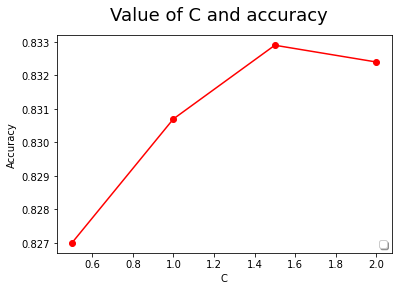

In [14]:
import matplotlib.pyplot as plt


#add names for the graph and axes
plt.suptitle('Value of C and accuracy',fontsize=18)
plt.xlabel('C')
plt.ylabel('Accuracy')

#and plot our series
plt.plot(c_val,accuracy,'ro-')


# add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
plt.legend(loc='lower right', shadow=True)
plt.show()